# 순환신경망(LSTM)
### IMDB(internet movie data base)제공하는 리뷰 데이터를 가지고 평점 예측하기

## 사용할 패키지 불러오기
### keras에서 필요한 데이터, 모델, 레이어를 import 함.
- Sequence : 레이어들을 선형으로 쌓는 모델
- Dense : 입출력을 연결해줌
- Enbedding : Data를 밀집 벡터로 만드는 층
- Flatten : 결과를 1차원으로 보여줌

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten


max_features = 20000 # 20000번째로 자주 사용 되는 단어 데이터
text_max_words = 200 # 데이터 최대길이 200

Using TensorFlow backend.


## 데이터셋 생성하기
- 25000개의 IMDB 훈련 SET을 다시 20000개의 훈련 SET과 5000개의 검증 SET으로 데이터 SET으로 생성한다

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

## 모델 구성하기
- 선형 모델로 구성
- max_fetures 즉 20000개의 데이터를 임베딩 한후의 벡터의 크기(특징의 크기)는 128이다
- 출력 뉴런은 1개이고 활성화함수 'sigmod'를 사용

In [3]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0805 10:15:16.785370 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 10:15:16.802305 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 10:15:16.804799 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 모델 학습과정 설정하기
- 모델을 loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] 형식으로 컴파일
- 생성된 모델을 model.summary()를 통해 출력해준다.

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0805 10:15:17.036148 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 10:15:17.123916 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 10:15:17.131900 11196 deprecation.py:323] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


## 모델 학습시키기

In [5]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val)) 
## 에포크 25로 설정 전체 IMDB 데이터를 25번 순환 학습

W0805 10:15:17.927593 11196 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 213s 11ms/step - loss: 0.4464 - acc: 0.7875 - val_loss: 0.3969 - val_acc: 0.8200
Epoch 2/25
20000/20000 [==============================] - 249s 12ms/step - loss: 0.2344 - acc: 0.9111 - val_loss: 0.3233 - val_acc: 0.8740
Epoch 3/25
20000/20000 [==============================] - 241s 12ms/step - loss: 0.1436 - acc: 0.9489 - val_loss: 0.3618 - val_acc: 0.8588
Epoch 4/25
20000/20000 [==============================] - 232s 12ms/step - loss: 0.0817 - acc: 0.9733 - val_loss: 0.4510 - val_acc: 0.8682
Epoch 5/25
20000/20000 [==============================] - 243s 12ms/step - loss: 0.0938 - acc: 0.9665 - val_loss: 0.4839 - val_acc: 0.8376
Epoch 6/25
20000/20000 [==============================] - 299s 15ms/step - loss: 0.0659 - acc: 0.9777 - val_loss: 0.4884 - val_acc: 0.8602
Epoch 7/25
20000/20000 [==============================] - 360s 18ms/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.6

## 학습과정 살펴보기
- matplotlib의 pyplot을 사용해 결과값을 그래픽으로 표현
- 4번째 에포크부터 훈련데이터의 정확도는 크게 오차가 없다.
- 학습데이터의 오차는 점점 줄어드는 걸 확인 할 수 있다.
- 약 14번,16번,19번 에포크에서 과적합이 일어나는걸 확인 할 수 있었고, 25번 학습 모델보다 18번정도의 학습 모델이 더 좋은 결과를 보여준다.

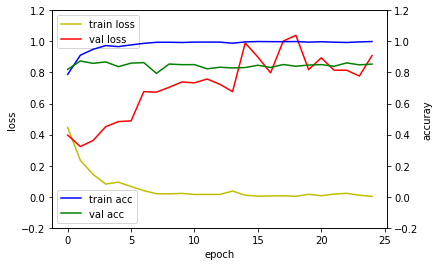

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 모델 평가하기
- 약 97%의 검증 정확도를 가진다

In [7]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 24s 960us/step
## evaluation loss and_metrics ##
[0.9664371558380127, 0.84692]
